# Data Wrangling
This notebook includes the following Data Wrangling tasks:
- Preparing dataset
- Data Cleaning
- Data Visualization
- Feauture Engineering
- Descriptive Statistics

## Preparing dataset
We have house data for different cities in Zealand, Denmark. In the following we would like to prepare the dataset, including data wrangling and exploration. First we create a dataframe housing which we add all of the different csv data to.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
zipcodes = [2100,2620,2740,2750,2760,2950,2960,2970,2980,2990,3000,3050,3060,3070,3080,3100,3120,3140,3150,3200,3210,3220,3230,3250,3320,3480,3490,2300,2400,2450,2500,2600,2610,2630,2640,2650,2690,2700,2720,2765,2770,2791,2800,2820,2830,2840,2850,2860,2870,2880,2900,2920,2930,2942,3300,3310,3360,3370,3400,3450,3460,3540,3550,3600,3650,3660,3670,4000]
dataframes = []

for zipcode in zipcodes:
    filename = f'../data/house_data/house_data_{zipcode}.csv'
    df = pd.read_csv(filename)
    df['Zipcode'] = zipcode
    dataframes.append(df)

housing = pd.concat(dataframes, ignore_index=True)
housing = housing.rename(columns={'X': 'Longitude'})
housing = housing.rename(columns={'Y': 'Latitude'})
housing = housing.drop(columns=["Url"])
housing.head()

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
0,"Nygårdsvej 41A, 2. tv",55.711602,12.570685,3895000,Ejerlejlighed,3,1969,lav,480,141,78.0,76,51250,C,2100
1,"Strandboulevarden 101, 2. th",55.707667,12.585303,6495000,Ejerlejlighed,4,NaN,lav,554,148,134.0,101,64306,C,2100
2,"Kildevældsgade 64, 4.",55.714347,12.571365,8495000,Ejerlejlighed,4,1907,lav,666,79,260.0,138,61557,C,2100
3,"Rosenvængets Hovedvej 48, st. 4",55.701222,12.587771,6195000,Ejerlejlighed,3,NaN,lav,638,124,249.0,88,70397,B,2100
4,H.C. Lumbyes Gade 39,55.714634,12.572670,13495000,Rækkehus,6,1902,lav,652,136,298.0,149,90570,C,2100


In [3]:
housing.tail()

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
7086,"Himmelev Have 3, st. 1",55.654501,12.102008,4295000,Ejerlejlighed,3,NaN,lav,"1,38",457,481.000,94,45691,A2010,4000
7087,Gevninge Bygade 43C,55.646939,11.960943,1395000,Ejerlejlighed,2,NaN,mellem,"6,02",260,612.000,78,17884,C,4000
7088,"Roskildevænget 24, 2. tv",55.627390,12.093665,2195000,Ejerlejlighed,3,1962,høj,"1,29",124,142.000,71,30915,C,4000
7089,"Algade 38, 2. tv",55.640782,12.087549,6250000,Ejerlejlighed,5,NaN,lav,95,455,101.000,147,42517,C,4000
7090,Fasanengen 5,55.693822,12.143911,6195000,Villa,6,2022,mellem,"5,06",521,1.018,179,34608,A2020,4000


In [4]:
housing.describe()

,Longitude,Latitude,Price,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Zipcode
count,7019.000000,7019.000000,7.091000e+03,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000
mean,55.810862,12.402706,5.905909e+06,628.887886,315.304737,130.577493,43678.158370,2962.094627
std,0.156828,0.194659,6.119488e+06,714.603072,292.382123,75.664871,22640.794781,422.241591
min,55.182104,9.080482,1.000000e+02,0.000000,1.000000,14.000000,1.000000,2100.000000
25%,55.668324,12.280847,2.848000e+06,218.000000,3.423000,83.000000,29088.000000,2700.000000
50%,55.767180,12.468397,4.398000e+06,377.000000,261.000000,119.000000,38571.000000,2920.000000
75%,55.937120,12.544942,6.895000e+06,686.500000,522.000000,160.000000,52951.000000,3230.000000
max,57.235624,12.674236,1.200000e+08,4459.000000,999.000000,1952.000000,284745.000000,4000.000000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7091 entries, 0 to 7090
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Address                    7091 non-null   object 
 1   Longitude                  7019 non-null   float64
 2   Latitude                   7019 non-null   float64
 3   Price                      7091 non-null   int64  
 4   Type                       7091 non-null   object 
 5   Room count                 7091 non-null   object 
 6   Construction year          5500 non-null   object 
 7   Risk of burglary           6853 non-null   object 
 8   Distance to pharmacy       7091 non-null   object 
 9   Distance to daycare        7091 non-null   int64  
 10  Distance to grocery store  7091 non-null   float64
 11  Size                       7091 non-null   int64  
 12  Squaremeter price          7091 non-null   int64  
 13  Energy class               5697 non-null   objec

In [6]:
housing.isnull().sum()

Address                         0
Longitude                      72
Latitude                       72
Price                           0
Type                            0
Room count                      0
Construction year            1591
Risk of burglary              238
Distance to pharmacy            0
Distance to daycare             0
Distance to grocery store       0
Size                            0
Squaremeter price               0
Energy class                 1394
Zipcode                         0
dtype: int64

Here we see that in our data we have 72 houses without **Longitude** and **Latitude**. For these we simply chose to remove them, since these labels are of high importance and it isn't a significant number, and also not for a specific city.

We also see that 1591 of 7000+ houses have missing **Construction year** and some even have wrongly inputed years. These do have importance and we don't want to scrap the whole house for this reason. What we will do is find the average construction year for the city and add it to the missing field.

We also see that 238 have missing **Risk of burglary** values. We will do the same as mentioned above, finding the average and inserting it.

Also 1394 **Energy class**es are missing. We will do the same as well for these values.

In [7]:
missing_coordinates = housing[housing['Longitude'].isnull() | housing['Latitude'].isnull()]
missing_coordinates["Zipcode"].value_counts()

Zipcode
2791    20
2770    12
2840    12
2300     8
3000     6
2950     3
3120     2
3300     2
3550     2
3060     1
3100     1
3490     1
2800     1
3600     1
Name: count, dtype: int64

since they are quite spread out and not all in a single city we remove them all from the housing.

In [8]:
housing = housing.dropna(subset=['Longitude', 'Latitude'])

In [9]:
housing.isnull().sum()

Address                         0
Longitude                       0
Latitude                        0
Price                           0
Type                            0
Room count                      0
Construction year            1579
Risk of burglary              227
Distance to pharmacy            0
Distance to daycare             0
Distance to grocery store       0
Size                            0
Squaremeter price               0
Energy class                 1347
Zipcode                         0
dtype: int64

Now onto fixing the contruction years.

In [10]:
# Firstly we convert all Construction Years to numbers - setting any non-numeric values to NaN
housing['Construction year'] = pd.to_numeric(housing['Construction year'], errors='coerce')

# Now we validate the Construction Year
current_year = pd.Timestamp.now().year
housing['Construction year'] = housing['Construction year'].apply(lambda x: x if 1800 <= x <= current_year else None)

# Now calculating the Average Construction Year for each zipcode
avg_construction_year_by_zipcode = housing.groupby('Zipcode')['Construction year'].mean()

# Method to fill in missing Construction Years
def fill_missing_construction_year(row):
    if pd.isnull(row['Construction year']):
        return avg_construction_year_by_zipcode[row['Zipcode']]
    else:
        return row['Construction year']

housing['Construction year'] = housing.apply(fill_missing_construction_year, axis=1)

# checking the result - if 0 is printed all missing values are filled
print(housing['Construction year'].isnull().sum())  

0


In [11]:
housing.isnull().sum()

Address                         0
Longitude                       0
Latitude                        0
Price                           0
Type                            0
Room count                      0
Construction year               0
Risk of burglary              227
Distance to pharmacy            0
Distance to daycare             0
Distance to grocery store       0
Size                            0
Squaremeter price               0
Energy class                 1347
Zipcode                         0
dtype: int64

Now onto fixing Risk of buglary.

In [12]:
# checking the distinct values of Risk Of Burglary
unique_burglary_risks = housing['Risk of burglary'].unique()
unique_burglary_risks

array(['lav', nan, 'mellem', 'meget lav', 'høj', 'meget høj'],
      dtype=object)

In [13]:
# Calculate the mode (most frequent value) for each zipcode
mode_risk_by_zipcode = housing.groupby('Zipcode')['Risk of burglary'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
mode_risk_by_zipcode

Zipcode
2100       lav
2300       lav
2400       lav
2450       lav
2500       lav
         ...  
3600       lav
3650    mellem
3660    mellem
3670    mellem
4000       lav
Name: Risk of burglary, Length: 68, dtype: object

In [14]:
# Now filling out missing values
# A method to fill missing risk of burglary with the mode for the zipcode
def fill_missing_risk(row):
    if pd.isnull(row['Risk of burglary']):
        return mode_risk_by_zipcode[row['Zipcode']]
    else:
        return row['Risk of burglary']

housing['Risk of burglary'] = housing.apply(fill_missing_risk, axis=1)

# checking the result - if 0 is printed all missing values are filled
print(housing['Risk of burglary'].isnull().sum())

0


In [15]:
housing.isnull().sum()

Address                         0
Longitude                       0
Latitude                        0
Price                           0
Type                            0
Room count                      0
Construction year               0
Risk of burglary                0
Distance to pharmacy            0
Distance to daycare             0
Distance to grocery store       0
Size                            0
Squaremeter price               0
Energy class                 1347
Zipcode                         0
dtype: int64

Great, now onto fixing Energy class

In [16]:
# Calculate the mode (most frequent value) for each zipcode
mode_energy_class_by_zipcode = housing.groupby('Zipcode')['Energy class'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
mode_energy_class_by_zipcode

Zipcode
2100    C
2300    C
2400    D
2450    C
2500    D
       ..
3600    C
3650    C
3660    C
3670    D
4000    C
Name: Energy class, Length: 68, dtype: object

In [17]:
# Method to fill missing energy class with the mode for the zipcode
def fill_missing_energy_class(row):
    if pd.isnull(row['Energy class']):
        return mode_energy_class_by_zipcode[row['Zipcode']]
    else:
        return row['Energy class']

housing['Energy class'] = housing.apply(fill_missing_energy_class, axis=1)

# checking the result - if 0 is printed all missing values are filled
print(housing['Energy class'].isnull().sum())

0


In [18]:
housing.isnull().sum()

Address                      0
Longitude                    0
Latitude                     0
Price                        0
Type                         0
Room count                   0
Construction year            0
Risk of burglary             0
Distance to pharmacy         0
Distance to daycare          0
Distance to grocery store    0
Size                         0
Squaremeter price            0
Energy class                 0
Zipcode                      0
dtype: int64

In [19]:
housing.shape

(7019, 15)

In [20]:
housing.columns

Index(['Address', 'Longitude', 'Latitude', 'Price', 'Type', 'Room count',
       'Construction year', 'Risk of burglary', 'Distance to pharmacy',
       'Distance to daycare', 'Distance to grocery store', 'Size',
       'Squaremeter price', 'Energy class', 'Zipcode'],
      dtype='object')

In [21]:
housing["Type"].unique()

array(['Ejerlejlighed', 'Rækkehus', 'Villalejlighed', 'Andelsbolig',
       'Villa', 'Helårsgrund', 'Fritidshus', 'Landejendom'], dtype=object)

In [22]:
housing.count()

Address                      7019
Longitude                    7019
Latitude                     7019
Price                        7019
Type                         7019
Room count                   7019
Construction year            7019
Risk of burglary             7019
Distance to pharmacy         7019
Distance to daycare          7019
Distance to grocery store    7019
Size                         7019
Squaremeter price            7019
Energy class                 7019
Zipcode                      7019
dtype: int64

Very nice. Now we see that we have 0 null values and a total of 7019 records with 15 columns.

In [23]:
housing["Type"].value_counts()

Type
Villa             3201
Ejerlejlighed     1993
Fritidshus         812
Rækkehus           715
Villalejlighed     151
Landejendom         82
Andelsbolig         53
Helårsgrund         12
Name: count, dtype: int64

In [24]:
housing["Energy class"].value_counts()

Energy class
C        2880
D        2082
E         579
B         503
A         280
F         208
A2010     196
A2015     135
G          95
A2020      61
Name: count, dtype: int64

In [25]:
housing.describe()

,Longitude,Latitude,Price,Construction year,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Zipcode
count,7019.000000,7019.000000,7.019000e+03,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000,7019.000000
mean,55.810862,12.402706,5.931986e+06,1958.396484,629.713919,315.424478,131.031771,43694.657644,2963.361305
std,0.156828,0.194659,6.141321e+06,32.522991,713.559621,292.679457,75.698249,22708.209864,423.318802
min,55.182104,9.080482,1.000000e+02,1800.000000,0.000000,1.000000,14.000000,1.000000,2100.000000
25%,55.668324,12.280847,2.880000e+06,1939.000000,219.000000,3.410500,84.000000,29069.500000,2690.000000
50%,55.767180,12.468397,4.450000e+06,1962.040000,377.000000,263.000000,120.000000,38559.000000,2920.000000
75%,55.937120,12.544942,6.950000e+06,1975.098958,689.000000,522.500000,160.000000,52952.500000,3230.000000
max,57.235624,12.674236,1.200000e+08,2023.000000,4459.000000,999.000000,1952.000000,284745.000000,4000.000000


In [26]:
sorted_df = housing.sort_values(by='Price', ascending=False)
sorted_df.head()

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
473,Vedbæk Strandvej 478,55.859498,12.562721,120000000,Villa,12,1917.000000,høj,"3,44",620,696.000,527,227703,C,2950
4938,Dronninggårds Alle 82,55.809434,12.452900,120000000,Villa,25,1909.000000,høj,"1,22",975,1.126,689,174165,F,2840
5328,Hambros Alle 3A,55.738302,12.577195,95000000,Villa,5,1935.598039,mellem,660,581,276.000,1268,74921,D,2900
6778,Store Valbyvej 276,55.726465,12.200265,88000000,Landejendom,12,1819.000000,meget lav,"4,65",1810,3.459,504,174603,E,3670
454,Vedbæk Strandvej 386,55.852279,12.568326,85000000,Villa,9,1962.237500,mellem,"4,30",475,181.000,413,205811,D,2950


We see that there are some very high value houses. We will investigate further. For now it is relevant to keep the higher value houses as well since they also contribute to the placement and have a relevance through it.

In [27]:
housing.dtypes

Address                       object
Longitude                    float64
Latitude                     float64
Price                          int64
Type                          object
Room count                    object
Construction year            float64
Risk of burglary              object
Distance to pharmacy          object
Distance to daycare            int64
Distance to grocery store    float64
Size                           int64
Squaremeter price              int64
Energy class                  object
Zipcode                        int64
dtype: object

We see that room count and distance to pharmacy have the wrong types. This indicates that something wrong was scraped on some of the webpages. We will fix them below.

Fixing Room count below:

In [28]:
# Converting Room count to numeric, coercing errors to NaN
housing['Room count'] = pd.to_numeric(housing['Room count'], errors='coerce')

# Calculating the median Room count for each zipcode
median_room_count_by_zipcode = housing.groupby('Zipcode')['Room count'].median()

# Method to fill missing Room count
def fill_missing_room_count(row):
    if pd.isnull(row['Room count']):
        return median_room_count_by_zipcode[row['Zipcode']]
    else:
        return row['Room count']

housing['Room count'] = housing.apply(fill_missing_room_count, axis=1)

# checking the result - if 0 is printed all missing values are filled
print(housing['Room count'].isnull().sum())  

0


In [29]:
housing.dtypes

Address                       object
Longitude                    float64
Latitude                     float64
Price                          int64
Type                          object
Room count                   float64
Construction year            float64
Risk of burglary              object
Distance to pharmacy          object
Distance to daycare            int64
Distance to grocery store    float64
Size                           int64
Squaremeter price              int64
Energy class                  object
Zipcode                        int64
dtype: object

Fixing Distance to pharmacy

In [30]:
import pandas as pd

# Converting Distance to pharmacy to numeric, coercing errors to NaN
housing['Distance to pharmacy'] = pd.to_numeric(housing['Distance to pharmacy'], errors='coerce')

# Calculate the median Distance to pharmacy for each zipcode
median_distance_to_pharmacy_by_zipcode = housing.groupby('Zipcode')['Distance to pharmacy'].median()

# Method to fill missing Distance to pharmacy at zipcode level
def fill_missing_distance_to_pharmacy(row):
    if pd.isnull(row['Distance to pharmacy']):
        return median_distance_to_pharmacy_by_zipcode[row['Zipcode']]
    else:
        return row['Distance to pharmacy']

# Apply the function to fill missing Distance to pharmacy values
housing['Distance to pharmacy'] = housing.apply(fill_missing_distance_to_pharmacy, axis=1)

# Calculate the overall median Distance to pharmacy
overall_median_distance_to_pharmacy = housing['Distance to pharmacy'].median()

# Fill remaining missing values with the overall median
housing['Distance to pharmacy'].fillna(overall_median_distance_to_pharmacy, inplace=True)

# Check the result - if 0 is printed, all missing values are filled
print(housing['Distance to pharmacy'].isnull().sum())  # This should be 0 if all missing values are filled


0


In [31]:
housing.dtypes

Address                       object
Longitude                    float64
Latitude                     float64
Price                          int64
Type                          object
Room count                   float64
Construction year            float64
Risk of burglary              object
Distance to pharmacy         float64
Distance to daycare            int64
Distance to grocery store    float64
Size                           int64
Squaremeter price              int64
Energy class                  object
Zipcode                        int64
dtype: object

## Data cleaning

## Data Visualization

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

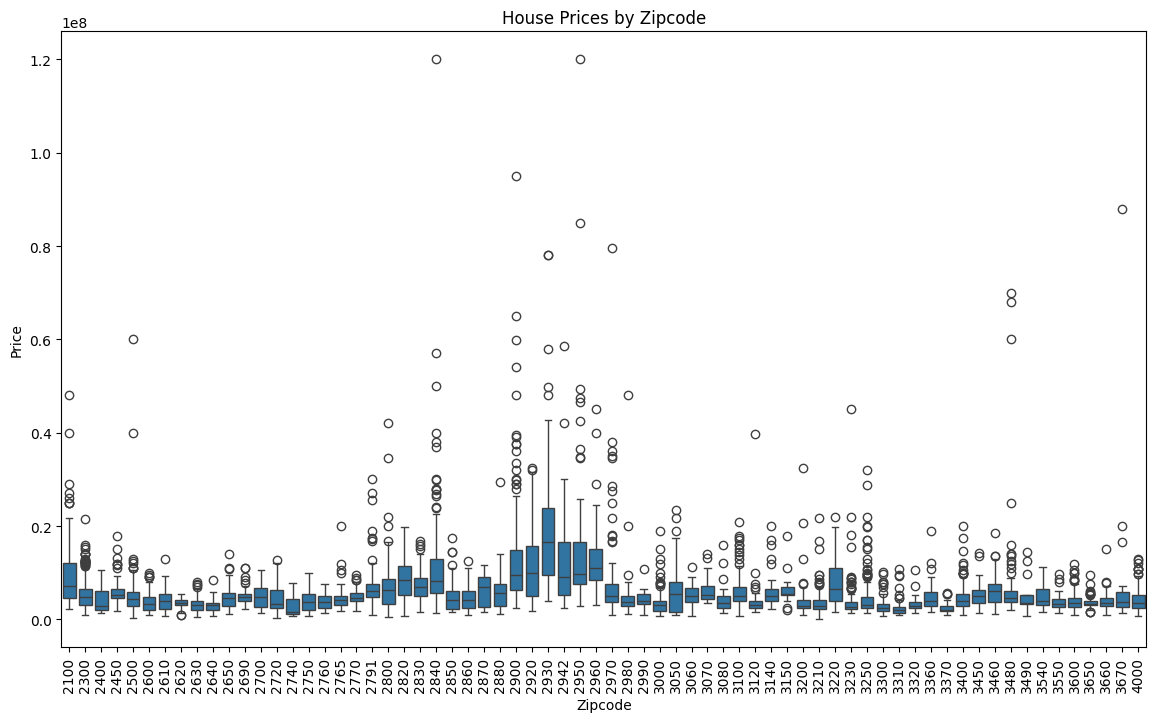

In [33]:
# Box plot for house prices by zipcode
plt.figure(figsize=(14, 8))
sns.boxplot(data=housing, x='Zipcode', y='Price')
plt.xticks(rotation=90)
plt.title('House Prices by Zipcode')
plt.show()

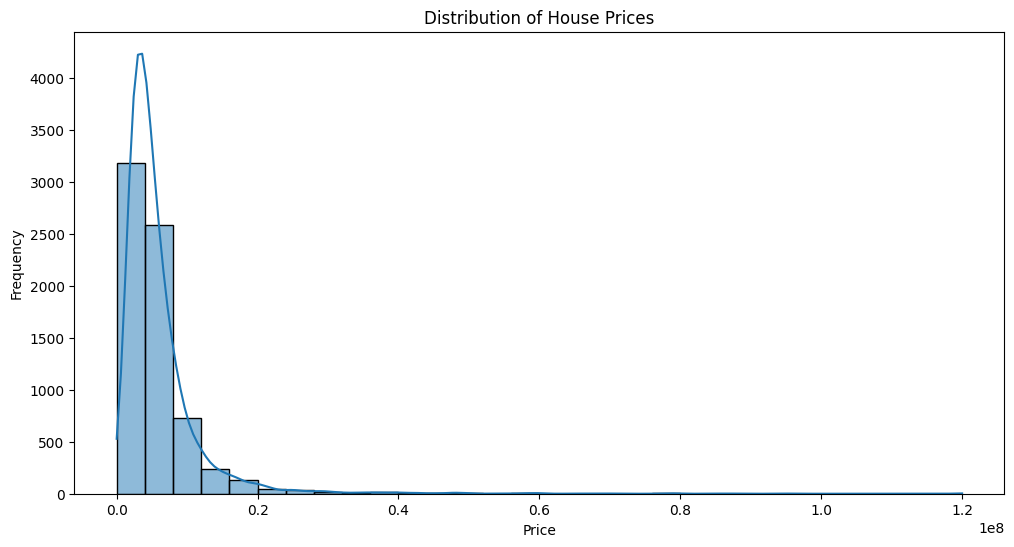

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(housing['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

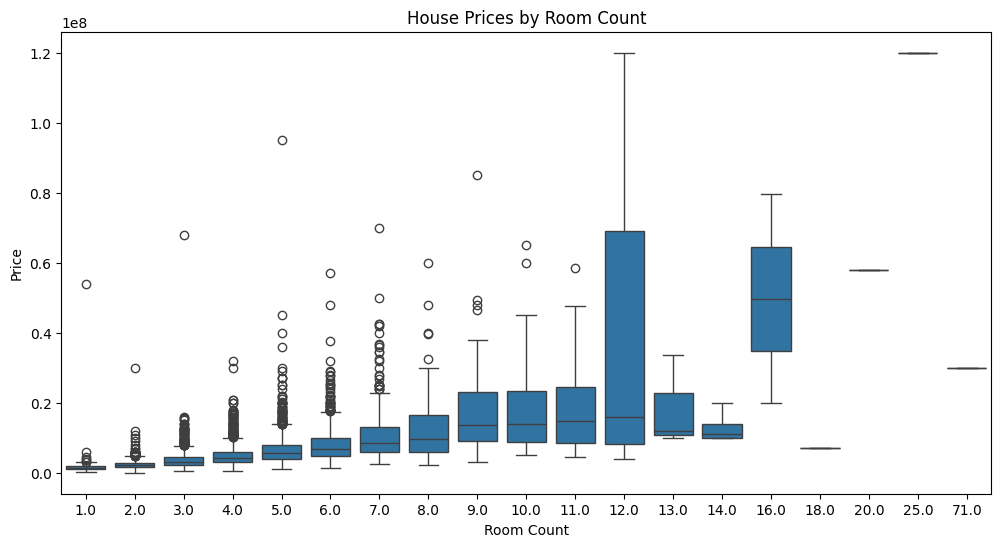

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing, x='Room count', y='Price')
plt.title('House Prices by Room Count')
plt.xlabel('Room Count')
plt.ylabel('Price')
plt.show()

WOW! Houses with 18, 20, 25 and 71 rooms!!! Let us check those out.

In [36]:
high_room_count_houses = housing[housing['Room count'] >= 18]
high_room_count_houses

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
1696,Møngevej 37A,56.068764,12.177167,6995000,Landejendom,18.0,1852.0,høj,611.0,2733,2.346,450,15544,F,3210
4305,Kalvebodvej 229,55.561206,12.577864,30000000,Landejendom,71.0,1943.0,mellem,713.0,633,4.177,556,53956,A,2791
4938,Dronninggårds Alle 82,55.809434,12.452900,120000000,Villa,25.0,1909.0,høj,622.0,975,1.126,689,174165,F,2840
5648,Klampenborgvej 50,55.770497,12.568812,58000000,Villa,20.0,1898.0,meget høj,905.5,298,1.002,937,61899,E,2930


Ok - they are actually valid.

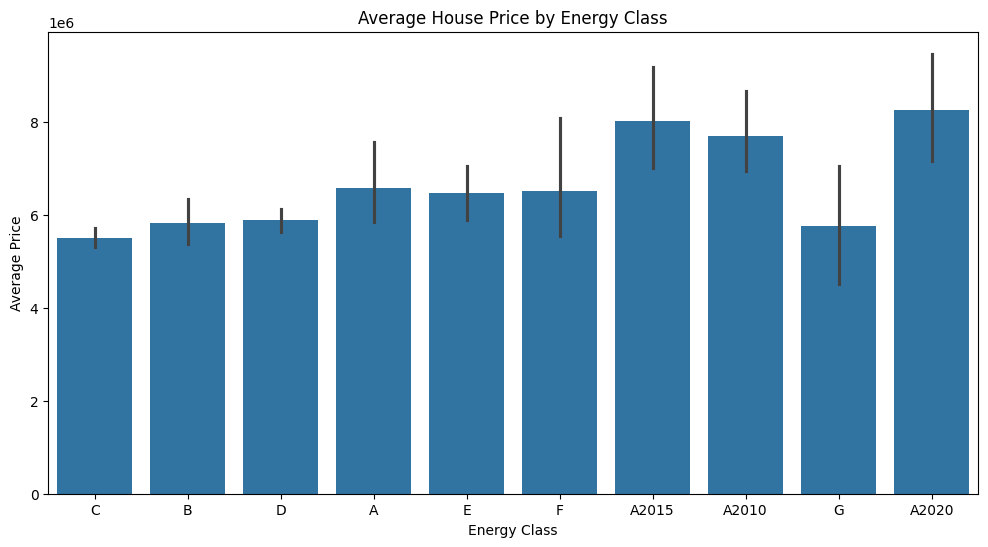

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=housing, x='Energy class', y='Price', estimator=lambda x: sum(x) / len(x))
plt.title('Average House Price by Energy Class')
plt.xlabel('Energy Class')
plt.ylabel('Average Price')
plt.show()

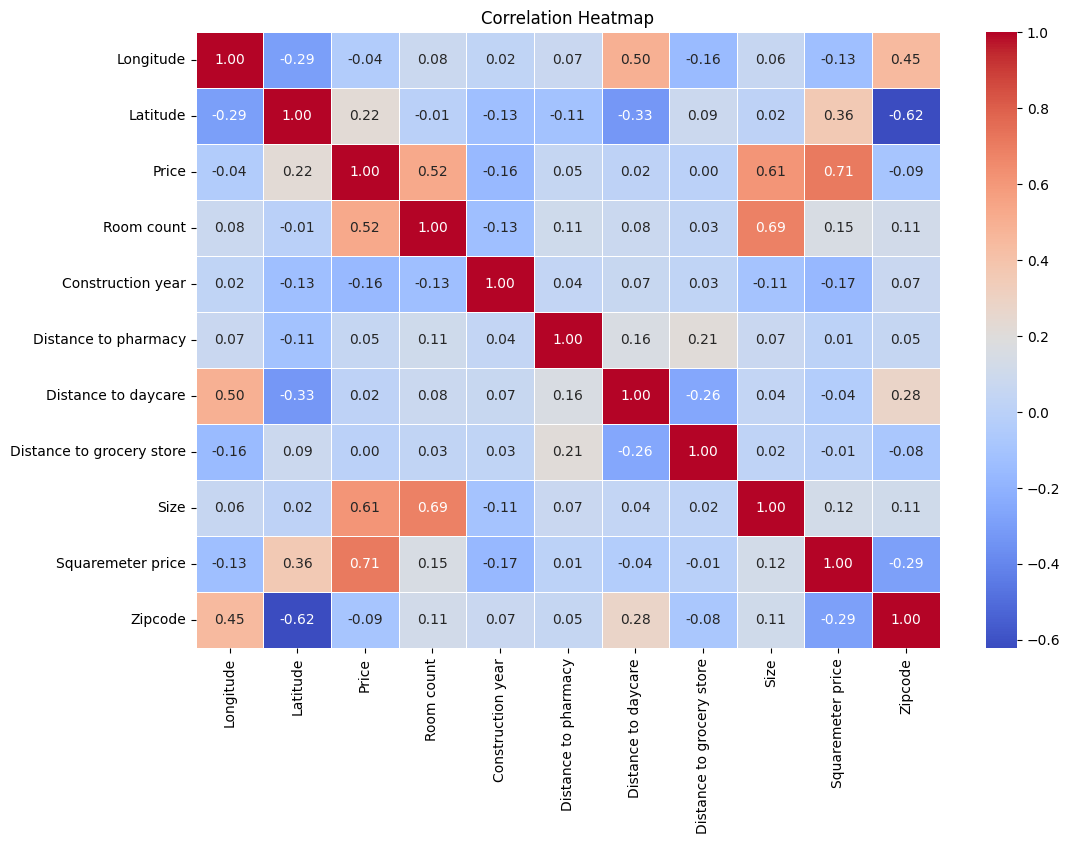

In [38]:
numeric_columns = housing.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap visually represents the relationships between different numerical features in your dataset using colors. The intensity of colors in the heatmap indicates the strength and direction of the correlation between pairs of features. Darker shades (e.g., dark blue) indicate strong negative correlation, meaning that as one feature increases, the other tends to decrease. Lighter shades (e.g., light yellow) indicate strong positive correlation, meaning that as one feature increases, the other tends to increase as well. Near-white colors (e.g., white) indicate little to no correlation between features.

The diagonal line from the top left to the bottom right of the heatmap represents the correlation of each feature with itself, which is always perfect correlation (1.0).

The numbers in each cell of the heatmap represent the correlation coefficient between the corresponding pair of features. This coefficient ranges from -1 to 1, where:
- -1 indicates perfect negative correlation,
- 0 indicates no correlation, and
- 1 indicates perfect positive correlation.

By examining the correlation heatmap, we can identify which features are positively or negatively correlated with each other.

We see that...

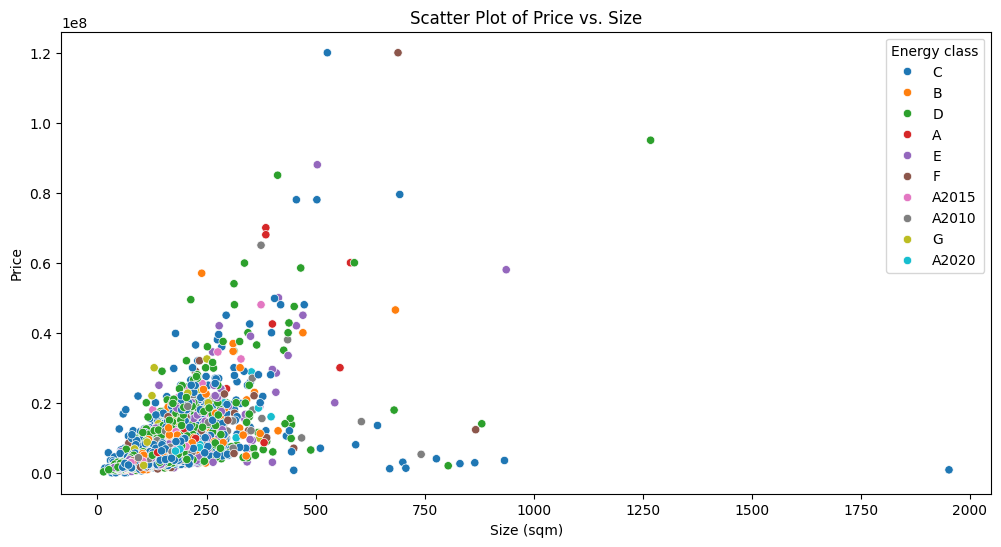

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=housing, x='Size', y='Price', hue='Energy class')
plt.title('Scatter Plot of Price vs. Size')
plt.xlabel('Size (sqm)')
plt.ylabel('Price')
plt.show()

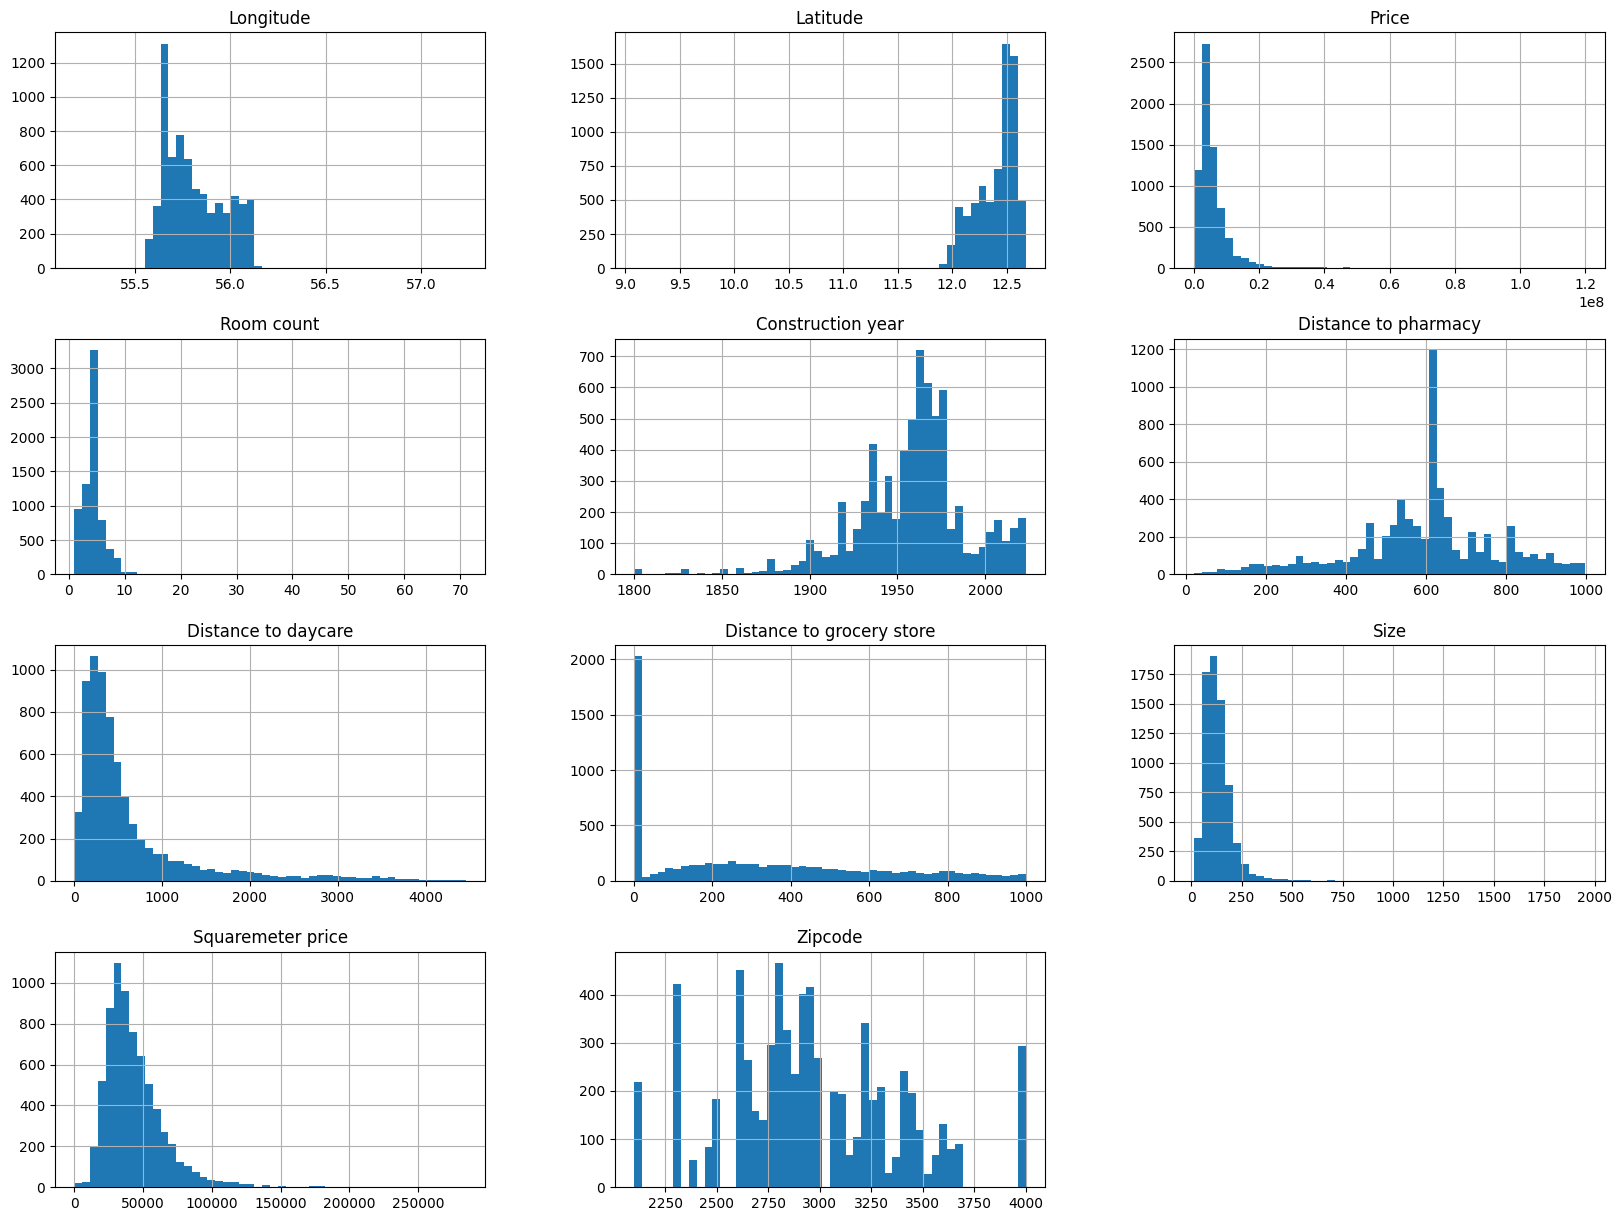

In [40]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

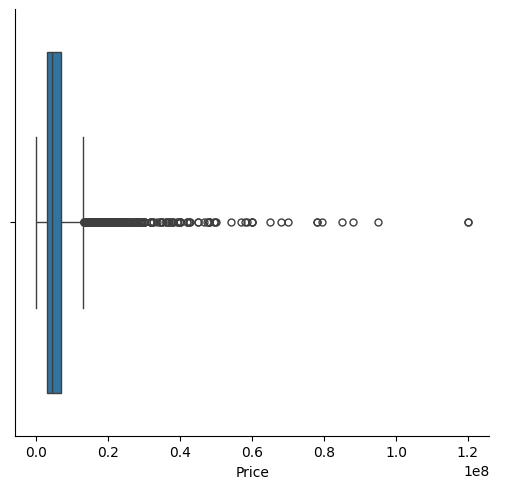

In [41]:
sns.catplot(data=housing, x="Price", kind="box")

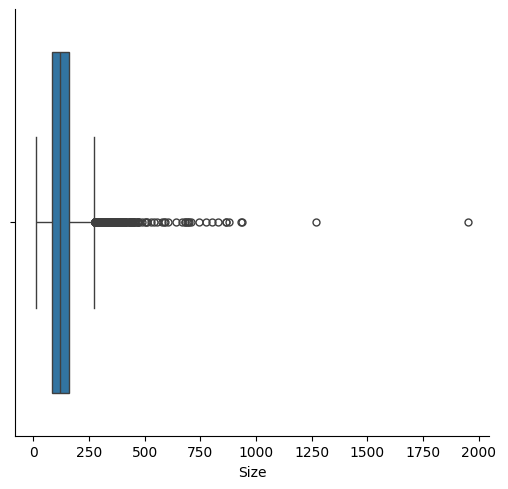

In [42]:
sns.catplot(data=housing, x="Size", kind="box")

We see.. outliers

A geographical scatterplot of the data

<Axes: xlabel='Latitude', ylabel='Longitude'>

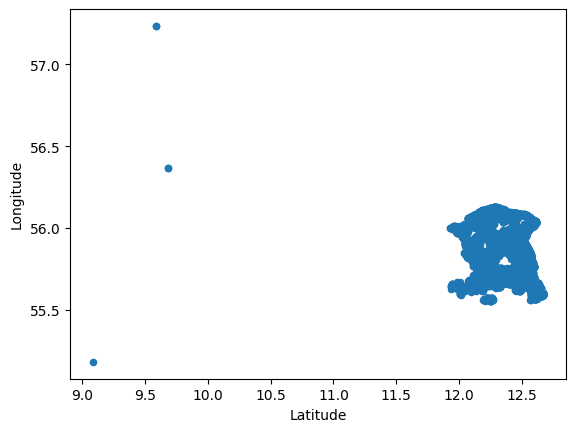

In [43]:
housing.plot(kind="scatter", x="Latitude", y="Longitude")

This looks like Sjælland on the right and some wrongly scraped houses from Jylland. Let us find out!

In [44]:
houses_with_low_latitude = housing[housing['Latitude'] < 10]
houses_with_low_latitude

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
1052,"Chr Rasmussens Vej 22, st. th",57.235624,9.586116,1895000,Ejerlejlighed,3.0,1953.0,lav,996.0,450,643.0,76,24934,E,3000
1056,Chr Rasmussens Vej 10,57.235624,9.586116,3495000,Villa,4.0,1936.0,lav,555.0,505,685.0,101,34603,C,3000
3281,"Damparken 36, 2. tv",55.182104,9.080482,2195000,Ejerlejlighed,2.0,1939.0,høj,657.0,172,169.0,57,38508,C,2610
4288,Hf. Sønderbro 22,56.368960,9.681442,949000,Fritidshus,2.0,1972.0,lav,713.0,993,888.0,42,22595,C,2791
4362,Hf. Sønderbro 9,56.370153,9.681480,1345000,Fritidshus,3.0,1973.0,lav,713.0,977,895.0,40,33625,C,2791


Our observations are correct. It seems that the Nominatim library misunderstood the address and fetched the wrong Longitudes and Latitudes. Let us quickly fix those.

In [45]:
import requests
import urllib.parse

In [46]:
def get_coordinates(address, zipcode):
    full_address = address.replace(" ", "+") + "+" + str(zipcode) + "," + "Denmark"
    print(full_address)
    base_url = "https://geocode.maps.co/search"
    params = {
        "q": urllib.parse.quote_plus(full_address),  # Replace spaces with '+'
        "api_key": "665f18dcc48a4872918342ena8eb150"
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data:
            # Assuming the first result is the correct one
            location = data[0]
            return location['lat'], location['lon']
    return None, None

In [47]:
for index, row in houses_with_low_latitude.iterrows():
    address = row['Address']
    zipcode = row['Zipcode']
    lat, lon = get_coordinates(address, zipcode)
    if lat is not None and lon is not None:
        houses_with_low_latitude.at[index, 'Latitude'] = lat
        houses_with_low_latitude.at[index, 'Longitude'] = lon

print(houses_with_low_latitude[['Address', 'Latitude', 'Longitude']])

Chr+Rasmussens+Vej+22,+st.+th+3000,Denmark
Chr+Rasmussens+Vej+10+3000,Denmark
Damparken+36,+2.+tv+2610,Denmark
Hf.+Sønderbro+22+2791,Denmark
Hf.+Sønderbro+9+2791,Denmark
                            Address  Latitude  Longitude
1052  Chr Rasmussens Vej 22, st. th  9.586116  57.235624
1056          Chr Rasmussens Vej 10  9.586116  57.235624
3281            Damparken 36, 2. tv  9.080482  55.182104
4288               Hf. Sønderbro 22  9.681442  56.368960
4362                Hf. Sønderbro 9  9.681480  56.370153


In [48]:
houses_with_low_latitude

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
1052,"Chr Rasmussens Vej 22, st. th",57.235624,9.586116,1895000,Ejerlejlighed,3.0,1953.0,lav,996.0,450,643.0,76,24934,E,3000
1056,Chr Rasmussens Vej 10,57.235624,9.586116,3495000,Villa,4.0,1936.0,lav,555.0,505,685.0,101,34603,C,3000
3281,"Damparken 36, 2. tv",55.182104,9.080482,2195000,Ejerlejlighed,2.0,1939.0,høj,657.0,172,169.0,57,38508,C,2610
4288,Hf. Sønderbro 22,56.368960,9.681442,949000,Fritidshus,2.0,1972.0,lav,713.0,993,888.0,42,22595,C,2791
4362,Hf. Sønderbro 9,56.370153,9.681480,1345000,Fritidshus,3.0,1973.0,lav,713.0,977,895.0,40,33625,C,2791


For now I will simply remove these from the housing dataframe...

In [49]:
housing = housing[housing['Latitude'] >= 10]
housing.shape

(7014, 15)

Ok - now we have 7014. Makes sense.

<Axes: xlabel='Latitude', ylabel='Longitude'>

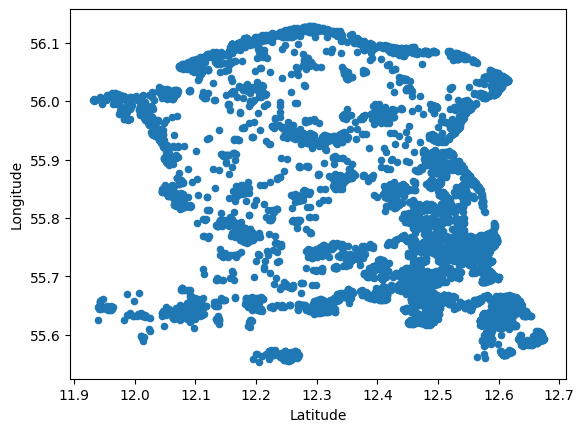

In [50]:
housing.plot(kind="scatter", x="Latitude", y="Longitude")

This looks much better --> SJÆLLAND.

<Axes: xlabel='Latitude', ylabel='Longitude'>

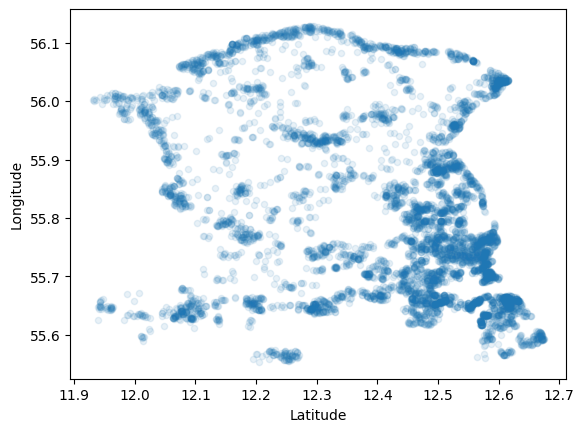

In [51]:
housing.plot(kind="scatter", x="Latitude", y="Longitude", alpha=0.1)

The bigger the circle, higher the price. Also displaying square meter price based on colors.

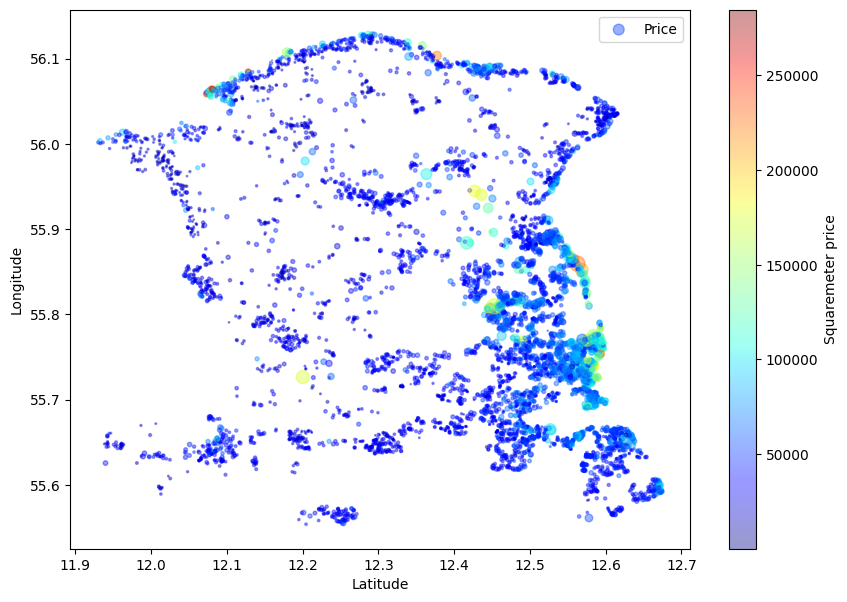

In [52]:
housing.plot(kind="scatter", x="Latitude", y="Longitude", alpha=0.4, s=housing["Price"]/1000000, label="Price", figsize=(10,7), c="Squaremeter price", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

As seen in the above plots, we can see that we are in Northern Zealand, starting from Helsingør in to top corner and going down to Lyngby area. We get an overview over the house locations and prices in the region. We also get an indication of the squaremeter prices where we see where the outliers mentioned earlier are located with a more reddish color. It is also interesting to see that the higher priced houses are located near the ocean near Vedbæk, Charlottenlund, Hellerup - not so surprising after all.

## Feature Engineering

## Descriptive Statistics

# Machine Learning Models

Before chosing a model we need to do feature selection.

It is a typical supervised learning task, since we have labeled training examples (each instance comes with the expected output). It is also a typical regression task, since we want to predict a value, that is the house price. More specifically, this is a multiple regression problem, since the system will use multiple features to make a prediction.

We would like to use the following features in our models:

- **Longitude** and **Latitude**: These are crucial for location-based valuation. Houses in different locations will have different prices.
- **Type**: Different types of houses (e.g., apartment, detached house) have different price ranges.
- **Room count**: The number of rooms can significantly impact the price.
- **Construction year**: Older houses might have different values compared to newer ones.
- **Risk of burglary**: Safety of the area can affect property prices.
- **Distance to pharmacy**: Proximity to amenities can impact house prices.
- **Distance to daycare**: Proximity to daycare facilities can be important for families with children.
- **Distance to grocery store**: Convenience of shopping can influence house prices.
- **Size**: The size of the house is a direct factor in its valuation.
- **Energy class**: More energy-efficient houses might be valued higher.
- **Zipcode**: This can capture location-specific factors that longitude and latitude alone might miss (such as school districts, local taxes, etc.).

Excluded Feature
- Squaremeter price: This is directly related to the price and would cause the model to trivially predict the price, introducing a flaw.

Preprocessing and Encoding
- Label Encoding for ordinal features (Risk of burglary, Energy class).
- One-Hot Encoding for nominal features (Type).

Model Training
We will use several models and evaluate their performance to choose the best one. These models include:

- Random Forest Regressor
- Gradient Boosting Regressor

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Drop the 'Squaremeter price' column
housing.drop(columns=['Squaremeter price'], inplace=True)

# Handle missing values if any (simple example with filling NaNs with mean)
housing.fillna(housing.mean(numeric_only=True), inplace=True)

# Label Encoding for ordinal features
label_encoders = {}
ordinal_features = ['Risk of burglary', 'Energy class']
for feature in ordinal_features:
    le = LabelEncoder()
    housing[feature] = le.fit_transform(housing[feature])
    label_encoders[feature] = le

# One-Hot Encoding for nominal features
nominal_features = ['Type']
housing = pd.get_dummies(housing, columns=nominal_features)

# Define features and target variable
X = housing.drop(columns=['Address', 'Price'])
y = housing['Price']

# List of numerical columns
numerical_columns = X.columns.difference(ordinal_features + [col for col in housing.columns if col.startswith('Type_')])

# Preprocessing pipelines for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns)
    ], remainder='passthrough')

# Models initialization with hyperparameters tuning
param_grids = {
    'Random Forest': {
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
}

best_models = {}
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    if model_name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    else:
        pipeline.fit(X_train, y_train)
        best_models[model_name] = pipeline

# Evaluate the models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f'{model_name}:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'R-squared: {r2_score(y_test, y_pred)}')
    print('')

# Model Ensemble using Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('rf', best_models['Random Forest']),
    ('gb', best_models['Gradient Boosting']),
    ('lr', best_models['Linear Regression'])
])

voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)

print('Voting Regressor:')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')


Best parameters for Random Forest: {'model__max_depth': 20, 'model__n_estimators': 500}
Best parameters for Gradient Boosting: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 500}
Linear Regression:
MAE: 2366629.231349393
MSE: 32697126267065.273
R-squared: 0.338267195180474

Ridge:
MAE: 2353115.4851252884
MSE: 32387174679036.85
R-squared: 0.34454007469988635

Lasso:
MAE: 2366624.038384712
MSE: 32697035781069.668
R-squared: 0.338269026459198

Decision Tree:
MAE: 2032897.4989308624
MSE: 29857990112335.75
R-squared: 0.3957263588876556

Random Forest:
MAE: 1454656.2753254566
MSE: 16895039188619.832
R-squared: 0.6580738754071347

Gradient Boosting:
MAE: 1445397.231764121
MSE: 17977833292861.67
R-squared: 0.6361600113632562

Voting Regressor:
MAE: 1587377.4354623544
MSE: 19355054182598.855
R-squared: 0.6082874627246375


Other way:

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
housing.columns

Index(['Address', 'Longitude', 'Latitude', 'Price', 'Room count',
       'Construction year', 'Risk of burglary', 'Distance to pharmacy',
       'Distance to daycare', 'Distance to grocery store', 'Size',
       'Energy class', 'Zipcode', 'Type_Andelsbolig', 'Type_Ejerlejlighed',
       'Type_Fritidshus', 'Type_Helårsgrund', 'Type_Landejendom',
       'Type_Rækkehus', 'Type_Villa', 'Type_Villalejlighed'],
      dtype='object')

In [56]:
housing.drop(columns=['Squaremeter price'], inplace=True)

KeyError: "['Squaremeter price'] not found in axis"

In [ ]:
# Encode categorical variables
categorical_columns = ['Type', 'Energy class', 'Risk of burglary']
encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(housing[categorical_columns])

In [ ]:
# Create a DataFrame with the encoded columns
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
# Combine the original DataFrame (dropping the categorical columns) with the encoded columns
housing = housing.drop(columns=categorical_columns).reset_index(drop=True)
housing = pd.concat([housing, encoded_cats_df], axis=1)

In [ ]:
# Define features and target variable
X = housing.drop(columns=['Address', 'Price'])
y = housing['Price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}


In [ ]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'{model_name}:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'R-squared: {r2_score(y_test, y_pred)}')
    print('')


In [ ]:
# Exclude the 'Address' column from the dataframe
df = housing.drop(columns=["Squaremeter price", "Address"])

# Calculate correlation matrix
correlation_matrix = df.corr()

# Select numerical features with correlation > 0.50 or < -0.50
important_num_cols = list(correlation_matrix['Price'][(correlation_matrix['Price'] > 0.50) | (correlation_matrix['Price'] < -0.50)].index)

# Select categorical features (example: Type, Risk of burglary, Energy class)
cat_cols = ['Type', 'Risk of burglary', 'Energy class']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Standardize numerical features
scaler = StandardScaler()
df[important_num_cols] = scaler.fit_transform(df[important_num_cols])

# Combine important numerical and categorical features
important_cols = important_num_cols + cat_cols

# Create a new dataframe with the selected features
df = df[important_cols]

In [ ]:
# Select numerical features with correlation > 0.50 or < -0.50 with the target variable 'Price'
important_num_cols = list(correlation_matrix['Price'][(correlation_matrix['Price'] > 0.50) | (correlation_matrix['Price'] < -0.50)].index)

# Remove 'Squaremeter price' if it was included by mistake
if 'Squaremeter price' in important_num_cols:
    important_num_cols.remove('Squaremeter price')

# Select additional categorical features deemed important
important_cat_cols = ['Type', 'Risk of burglary', 'Energy class']

# Combine selected numerical and categorical features
important_cols = important_num_cols + important_cat_cols

# Create a new DataFrame with the selected features
df_selected_features = df[important_cols]

# Optionally, you can print or visualize the correlation matrix for further analysis
correlation_matrix

In [ ]:
sns.pairplot(df[important_num_cols])

In [ ]:
# Combine selected numerical, categorical features, and the target variable 'Price'
important_num_cols.remove('Price')
important_cols = important_num_cols + important_cat_cols

# Check if 'Price' is already in the list, if not, add it
if 'Price' not in important_cols:
    important_cols.append('Price')

# Create a new DataFrame with the selected features
df_selected_features = df[important_cols]

# Split the data into features (X) and target variable (y)
X = df_selected_features.drop("Price", axis=1)
y = df_selected_features["Price"]

# One-Hot Encoding for categorical features
X = pd.get_dummies(X, columns=important_cat_cols)

# Standardize the numerical columns in X dataset
scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

# Display the first few rows of the preprocessed features
X.head()


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define evaluation functions
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r_squared = r2_score(y_true, y_pred)
    return mae, mse, rmse, r_squared

In [ ]:
# Machine Learning Models
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

### Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

In [ ]:
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

### Ridge Regression

In [ ]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

# Evaluate the model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

# Add results to the models DataFrame
new_row = {"Model": "Ridge", "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models._append(new_row, ignore_index=True)

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models._append(new_row, ignore_index=True)

In [ ]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models._append(new_row, ignore_index=True)

In [ ]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models._append(new_row, ignore_index=True)

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models._append(new_row, ignore_index=True)

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models._append(new_row, ignore_index=True)

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models._append(new_row, ignore_index=True)

# Model Comparison

In [ ]:
models.sort_values(by="RMSE (Cross-Validation)")

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()